# Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
dataset = pd.read_csv("datasetforproject.csv")

### Checking for null values

In [3]:
dataset.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

### There is not any null values

In [4]:
dataset.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## Observations

Some preliminary peculiarities from the describe table:

1. Age
 - The column is in units of days, not in years. This will be corrected to yearly to better understand the age. 

2. Gender   
 - The options are between 1 and 2. This will be changed to 0 and 1 for better computations later on with learning models.
 - There are more of gender 1 than 2. The data is not equally split into genders.

3. Height
 - Unit is in cms.

4. Weight
 - Unit is in kgs.

5. ap_hi / ap_lo
 - The units can be assumed to be in mm of Hg. 
 - The min value is negative which is highly unlikely as normal blood pressure will be between 120/90 (systolic/diastolic) mm of Hg.
 - The max value is above 10,000 which is also highly unlikely.

6. Cholesterol
 - Value is in classes (1/2/3) where 1: normal, 2: above normal, 3: well above normal.

7. Gluc
 - Value is in classes (1/2/3) where 1: normal, 2: above normal, 3: well above normal.

8. Smoke / Alco / Active
 - These are subjective features which are asked to patients. May not be reliable data. 

9. Cardio
 - Target variable: Presence or absence of cardiovascular disease.
 - Roughly half of the subjects have cardiovascular diseases at the time of examination.

## 1. Age

### Converting the days to years

In [5]:
dataset["age"] = dataset["age"].apply(lambda x: round(x/365))

In [6]:
dataset["age"].head()

0    50
1    55
2    52
3    48
4    48
Name: age, dtype: int64

### Checking the distribution for outliers

<Axes: title={'center': 'Age Data'}, ylabel='Age'>

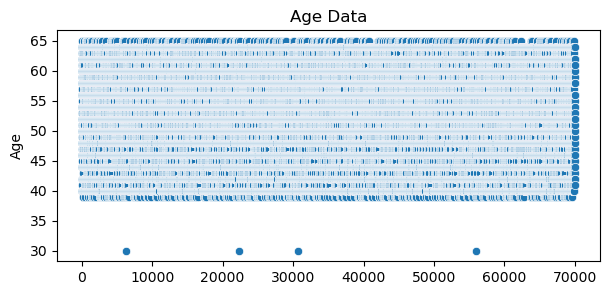

In [7]:
plt.figure(figsize = (7,3))
plt.title("Age Data")
plt.ylabel("Age")
sns.scatterplot(data = dataset["age"])

In [8]:
# There are a few outliers. Check to see what percentage they are of the total data and then delete the rows.
(dataset["age"] < 35).value_counts()/len(dataset)*100

False    99.994286
True      0.005714
Name: age, dtype: float64

### There are negligible entries. 


### 2. Gender

In [9]:
dataset["gender"].value_counts()/len(dataset)*100

1    65.042857
2    34.957143
Name: gender, dtype: float64

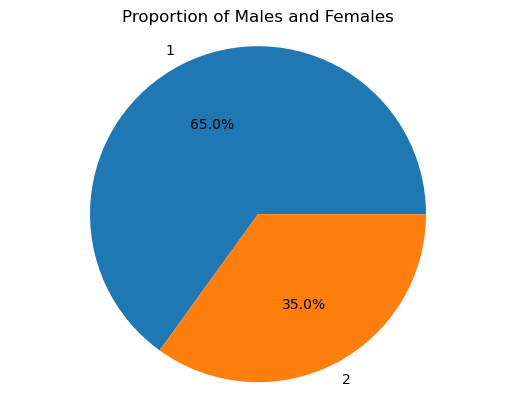

In [10]:
gender_counts = dataset['gender'].value_counts()
proportions = gender_counts / gender_counts.sum()

# Create a pie chart
plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Proportion of Males and Females')
plt.show()

### Need to determine which gender is male and which is female to draw any conclusions. First convert 1/2 to 0/1.

In [11]:
 dataset["gender"] = dataset["gender"].apply(lambda x: x-1)

In [12]:
dataset["gender"].value_counts()/len(dataset)*100

0    65.042857
1    34.957143
Name: gender, dtype: float64

In [13]:
# Using the height as an indicator of which gender is 1. On average, the taller gender will be male.
dataset.groupby(by = "gender").mean()

,id,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
gender,,,,,,,,,,,,
0,49898.345267,53.452844,161.355612,72.565605,128.139249,94.522776,1.384735,1.235054,0.017856,0.025500,0.802021,0.496727
1,50110.246547,53.126277,169.947895,77.257307,130.078872,100.551982,1.333633,1.210462,0.218880,0.106375,0.806906,0.505231


### Gender 1 is taller. The column will be renamed to 'male' for clarity.

In [14]:
dataset.rename(columns = {"gender": "male"}, inplace = True)

In [15]:
dataset.head()

,id,age,male,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,1,168,62.0,110,80,1,1,0,0,1,0
1,1,55,0,156,85.0,140,90,3,1,0,0,1,1
2,2,52,0,165,64.0,130,70,3,1,0,0,0,1
3,3,48,1,169,82.0,150,100,1,1,0,0,1,1
4,4,48,0,156,56.0,100,60,1,1,0,0,0,0


### It can be inferred that there are twice as many entries of data for females in comparison to males.

<Axes: title={'center': 'Height Data'}, ylabel='Height (cms)'>

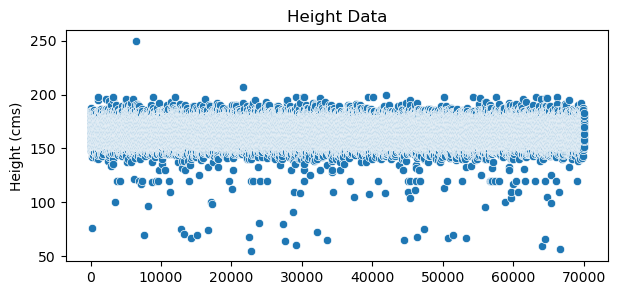

In [16]:
# Checking the distribution for outliers

plt.figure(figsize = (7,3))
plt.title("Height Data")
plt.ylabel("Height (cms)")
sns.scatterplot(data = dataset["height"])

In [17]:
# For outliers, the condition Achondroplasia, also known as dwarfism, will be taken as a lower limit.  
# People with Achondroplasia may have an increased risk of cardiovascular diseases [1], which would affect the data analysis for the focused parameters.
# A height of 4'10" or 148 cm will be used to cutoff the data. This is as per Little People of America (LPA)

# Checking the percent of samples.
(dataset["height"] < 148).value_counts()/len(dataset)*100

False    98.72
True      1.28
Name: height, dtype: float64

In [18]:
# Removing the data that has a high likeliness of the patient having Achondroplasia. It is only 1.3 % of the data

dataset = dataset[dataset["height"] > 148]

In [19]:
# There are only 2 data points above 200 cm so those will be removed as well.
dataset = dataset[dataset["height"] < 201]

### 3. Weight

In [20]:
# Adding a new parameter for Body Mass Index (bmi), a metric used to classify weight per height class.
# This will be a better indicator of health using weight and height.
# BMI = kg/m2

dataset["bmi"] = dataset["weight"] *10000 / ((dataset["height"])**2)

In [21]:
# Now the bmi can be split into classes of bmi, which would help understand the data more.

bmi_ranges = [
    (dataset["bmi"] <= 15),                                 # 0 - Anorexic
    (dataset["bmi"] > 15) & (dataset["bmi"] <= 18.5),       # 1 - Underweight
    (dataset["bmi"] > 18.5) & (dataset["bmi"] <= 25),       # 2 - Normal weight
    (dataset["bmi"] > 25) & (dataset["bmi"] <= 30),         # 3 - Overweight
    (dataset["bmi"] > 30) & (dataset["bmi"] <= 35),         # 4 - Obesity Class I
    (dataset["bmi"] > 35) & (dataset["bmi"] <= 40),         # 5 - Obesity Class II
    (dataset["bmi"] > 40)                                   # 6 - Obesity Class III 
]

classes = [0, 1, 2, 3, 4, 5, 6]

dataset["bmi_class"] = np.select(bmi_ranges, classes)

In [22]:
dataset.head(10)

,id,age,male,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_class
0,0,50,1,168,62.0,110,80,1,1,0,0,1,0,21.967120,2
1,1,55,0,156,85.0,140,90,3,1,0,0,1,1,34.927679,4
2,2,52,0,165,64.0,130,70,3,1,0,0,0,1,23.507805,2
3,3,48,1,169,82.0,150,100,1,1,0,0,1,1,28.710479,3
4,4,48,0,156,56.0,100,60,1,1,0,0,0,0,23.011177,2
5,8,60,0,151,67.0,120,80,2,2,0,0,0,0,29.384676,3
6,9,61,0,157,93.0,130,80,3,1,0,0,1,0,37.729725,5
7,12,62,1,178,95.0,130,90,3,3,0,0,1,1,29.983588,3
8,13,48,0,158,71.0,110,70,1,1,0,0,1,0,28.440955,3
9,14,54,0,164,68.0,110,60,1,1,0,0,0,0,25.282570,3


In [23]:
# The bmi class 0 (< 15) alludes to an extremely severe case of anorexia in the patient [3]. This will be created as a new label to account for the condition and to assess if it affects the cardio column.

### 4. Blood Pressure

<Axes: title={'center': 'Blood Pressure Data'}, xlabel='Systolic Blood Pressure (mmHg)', ylabel='Diastolic Blood Pressure (mmHg)'>

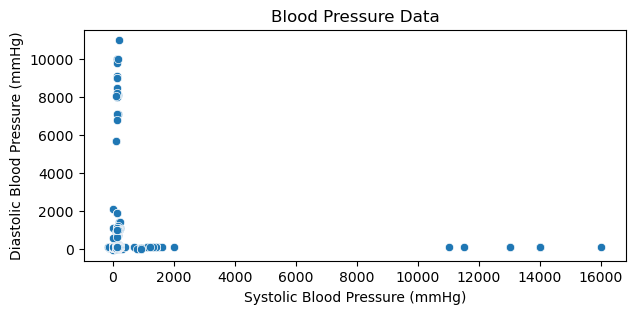

In [24]:
# Checking the distribution for outliers

plt.figure(figsize = (7,3))
plt.title("Blood Pressure Data")
plt.xlabel("Systolic Blood Pressure (mmHg)")
plt.ylabel("Diastolic Blood Pressure (mmHg)")
sns.scatterplot(data = dataset, x = "ap_hi", y = "ap_lo")

<Axes: title={'center': 'Blood Pressure Data'}, xlabel='Systolic Blood Pressure (mmHg)', ylabel='Diastolic Blood Pressure (mmHg)'>

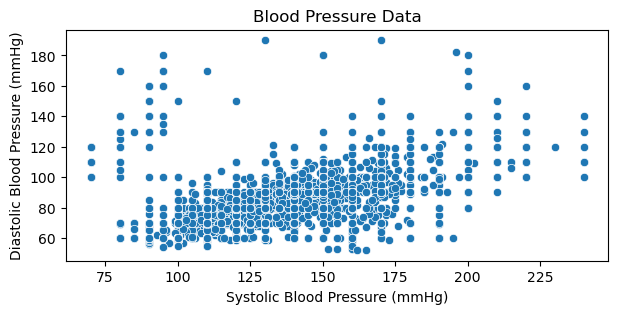

In [25]:
# The blood pressure data is out of proportion and should not be in the thousands. Outliers will be removed and checked again.

# Checking the distribution for outliers within the narrower ranges

plt.figure(figsize = (7,3))
plt.title("Blood Pressure Data")
plt.xlabel("Systolic Blood Pressure (mmHg)")
plt.ylabel("Diastolic Blood Pressure (mmHg)")
sns.scatterplot(data = dataset[(dataset["ap_hi"] < 400) & (dataset["ap_lo"] < 350) & (dataset["ap_hi"] > 50) & (dataset["ap_lo"] > 50)], x = "ap_hi", y = "ap_lo")

#Upon iterating through the graphs, the present limits seem to be ideal for removing outliers.

In [26]:
# Checking the length of the dataframe with the conditions in comparison to the one including the outliers, for blood pressure.

len(dataset[(dataset["ap_hi"] < 400) & (dataset["ap_lo"] < 350) & (dataset["ap_hi"] > 50) & (dataset["ap_lo"] > 50)]) / len(dataset)*100

98.15121653440308

In [27]:
# It removes around 1.85% data
# Removing the outliers

dataset = dataset[(dataset["ap_hi"] < 400) & (dataset["ap_lo"] < 350) & (dataset["ap_hi"] > 50) & (dataset["ap_lo"] > 50)]

In [28]:
# Re-arranging to have the target at the end
dataset.insert(len(dataset.columns)-1, 'cardio', dataset.pop('cardio'))

In [29]:
dataset.head()

,id,age,male,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi,bmi_class,cardio
0,0,50,1,168,62.0,110,80,1,1,0,0,1,21.967120,2,0
1,1,55,0,156,85.0,140,90,3,1,0,0,1,34.927679,4,1
2,2,52,0,165,64.0,130,70,3,1,0,0,0,23.507805,2,1
3,3,48,1,169,82.0,150,100,1,1,0,0,1,28.710479,3,1
4,4,48,0,156,56.0,100,60,1,1,0,0,0,23.011177,2,0


In [30]:
dataset.shape

(67530, 15)

## Checking for duplicate rows

In [31]:
duplicate_rows = dataset[dataset.duplicated('id')]
print("Number of duplicate rows: ", duplicate_rows.shape[0])

Number of duplicate rows:  0


## DATA ANALYSIS PART

<Axes: >

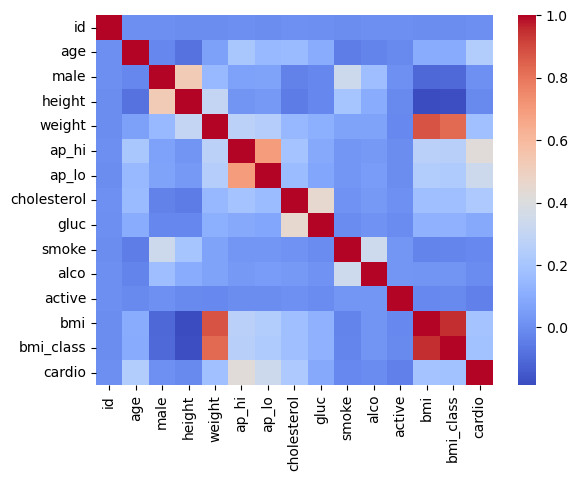

In [32]:
sns.heatmap(dataset.corr(), cmap = "coolwarm")

# There are no specifically high correlations apart from the ones already known.

In [33]:
# Grouping the headers. There are correlations between ap_hi - ap_lo and height/weight - bmi. Height and Weight can be ignored and replaced with bmi.

subjective = ["smoke", "alco", "active"]

classification = ["male", "cholesterol", "gluc"]

linear = ["age", "ap_hi", "ap_lo", "bmi"] 

In [34]:
dataset.corr()["cardio"].sort_values()

active        -0.038165
smoke         -0.016102
height        -0.009558
alco          -0.007707
id             0.004325
male           0.008435
gluc           0.088500
weight         0.180704
bmi_class      0.183929
bmi            0.190434
cholesterol    0.220520
age            0.238399
ap_lo          0.336074
ap_hi          0.425238
cardio         1.000000
Name: cardio, dtype: float64

<Axes: title={'center': 'Cardiovascular disease per age'}, xlabel='age', ylabel='count'>

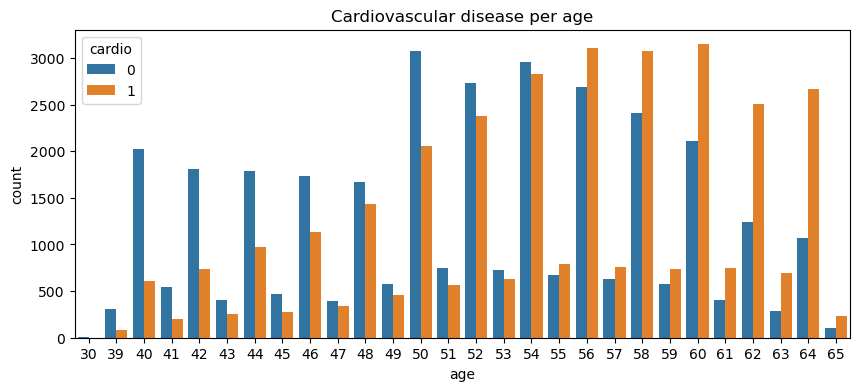

In [35]:
plt.figure(figsize = (10,4))
plt.title("Cardiovascular disease per age")
plt.xlabel("Age (yrs)")

sns.countplot(data = dataset, x = "age",  hue = "cardio")

# For an unknown reason, there are considerably more patients with an even yearly age than an odd yearly age. 


It can be observed that increase in age results in increase in the probability of a patient having a cardiovascular disease. 
The chances are highest past the age of 56. |

In [36]:
# It is possible that other factors increase with age which in turn causes the increase in probability of cardiovascular disease
# The parameters will be checked for trends

C:\Users\absol\AppData\Local\Temp\ipykernel_2764\3482387097.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dataset.groupby(by = "age")[ "ap_hi", "ap_lo"].mean().plot()


Text(0.5, 0, 'Age (yrs)')

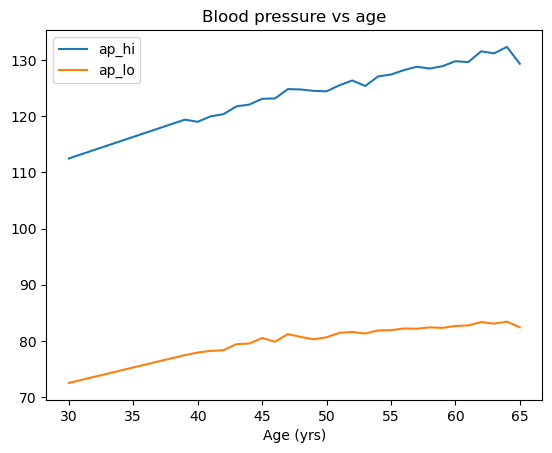

In [37]:
dataset.groupby(by = "age")[ "ap_hi", "ap_lo"].mean().plot()
plt.title("Blood pressure vs age")
plt.xlabel("Age (yrs)")

# There is an increase in blood pressure with age

Text(0.5, 0, 'Age (yrs)')

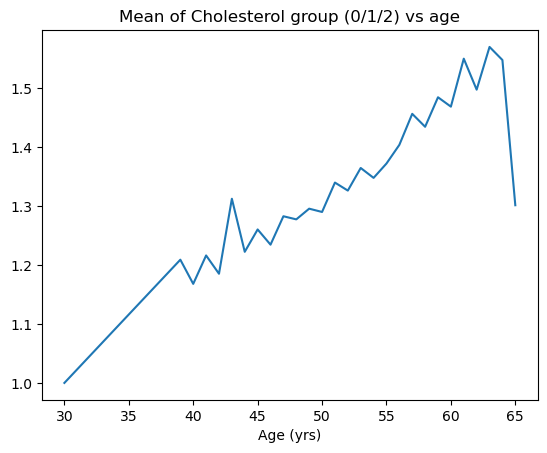

In [38]:
dataset.groupby(by = "age")[ "cholesterol"].mean().plot()
plt.title("Mean of Cholesterol group (0/1/2) vs age")
plt.xlabel("Age (yrs)")

# There is an increase in cholesterol with age

C:\Users\absol\AppData\Local\Temp\ipykernel_2764\1630460896.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dataset.groupby(by = "age")[ "alco", "smoke"].mean().plot()


Text(0.5, 0, 'Age (yrs)')

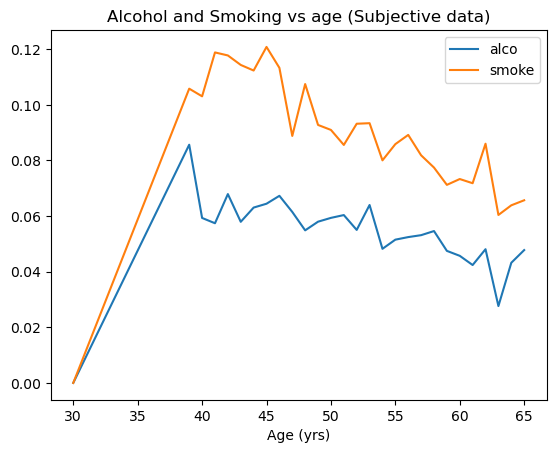

In [39]:
dataset.groupby(by = "age")[ "alco", "smoke"].mean().plot()
plt.title("Alcohol and Smoking vs age (Subjective data)")
plt.xlabel("Age (yrs)")

# As age increases, there is a decrease in the consumption of alcohol and smoking. This may be due to a variety of reasons: 
#       1. Increase in lying amongst elder patients
#       2. Generational difference in the interest in consumptions
#       3. Or as would have been ideally predicted through the data, a decrease in consumption as age increases due to growing concerns for health

Text(0, 0.5, 'Cardiovascular disease Presence')

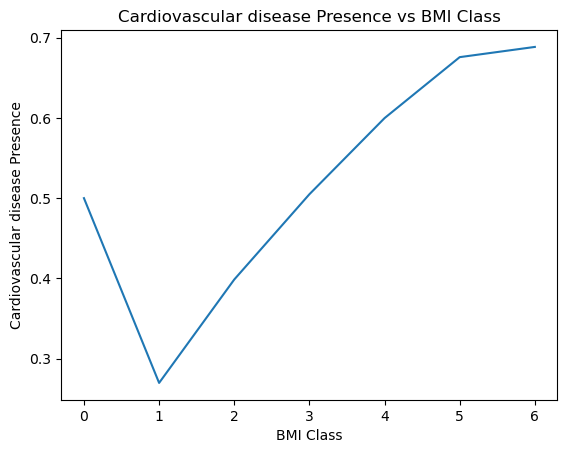

In [40]:
dataset.groupby(by = "bmi_class")[ "cardio"].mean().plot()
plt.title("Cardiovascular disease Presence vs BMI Class")
plt.xlabel("BMI Class")
plt.ylabel("Cardiovascular disease Presence")

# 0 - Anorexic  
# 1 - Underweight 
# 2 - Normal weight
# 3 - Overweight
# 4 - Obesity Class I
# 5 - Obesity Class II
# 6 - Obesity Class III 

# Patients in higher BMI classes have higher chances to have cardiovascular diseases. Anorexic patients also have a higher chance of getting cardiovascular diseases.

This can also be visalized as a scatterplot. In this plot, the BMI falls under classes and it can be visibly confirmed that there is a higher density of positive disease cases in higher BMI classes

<Axes: title={'center': 'BMI vs Cardio Data'}, xlabel='Weight (kgs)', ylabel='Height (cms)'>

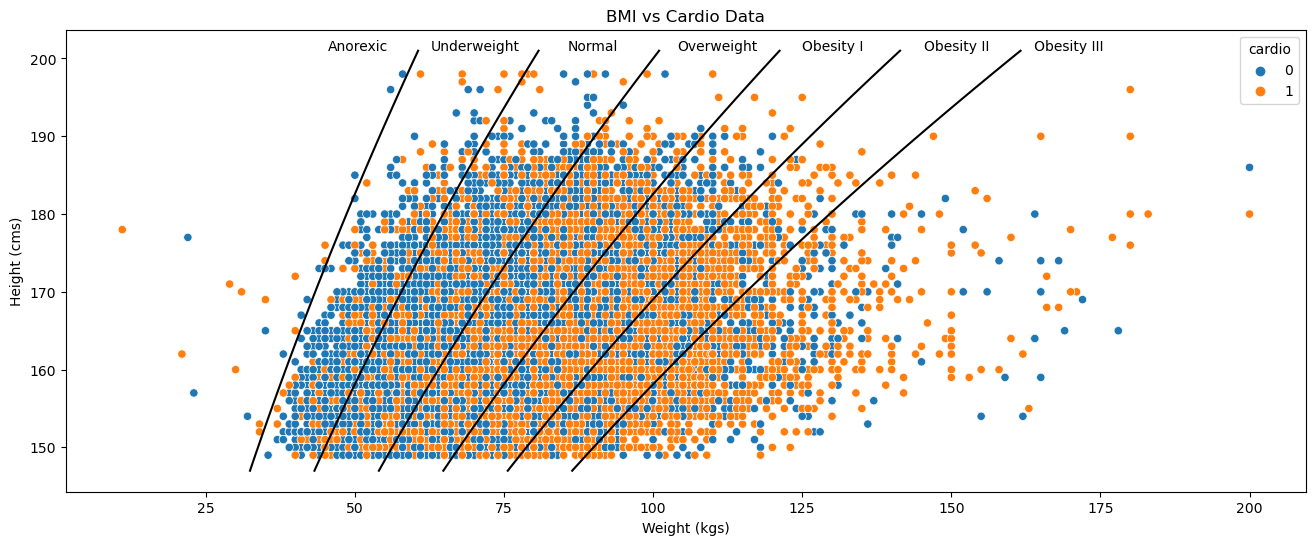

In [41]:
plt.figure(figsize = (16,6))
plt.title("BMI vs Cardio Data")
plt.xlabel("Weight (kgs)")
plt.ylabel("Height (cms)")

y_plot = np.linspace(147,201,100)
x_plot = 15 * (y_plot**2) / 10000
x_plot2 = 20 * (y_plot**2) / 10000
x_plot3 = 25 * (y_plot**2) / 10000
x_plot4 = 30 * (y_plot**2) / 10000
x_plot5 = 35 * (y_plot**2) / 10000
x_plot6 = 40 * (y_plot**2) / 10000

plt.plot(x_plot, y_plot, "black")
plt.plot(x_plot2, y_plot, "black")
plt.plot(x_plot3, y_plot, "black")
plt.plot(x_plot4, y_plot, "black")
plt.plot(x_plot5, y_plot, "black")
plt.plot(x_plot6, y_plot, "black")

plt.text(x_plot[-50], y_plot[-1], "Anorexic")
plt.text(x_plot2[-45], y_plot[-1], "Underweight")
plt.text(x_plot3[-30], y_plot[-1], "Normal")
plt.text(x_plot4[-28], y_plot[-1], "Overweight")
plt.text(x_plot5[-23], y_plot[-1], "Obesity I")
plt.text(x_plot6[-20], y_plot[-1], "Obesity II ")
plt.text(x_plot6[99], y_plot[-1], "   Obesity III ")

sns.scatterplot(data = dataset, x = "weight", y = "height", hue = "cardio")

<Axes: title={'center': 'Cardiovascular disease vs Active'}, xlabel='active', ylabel='count'>

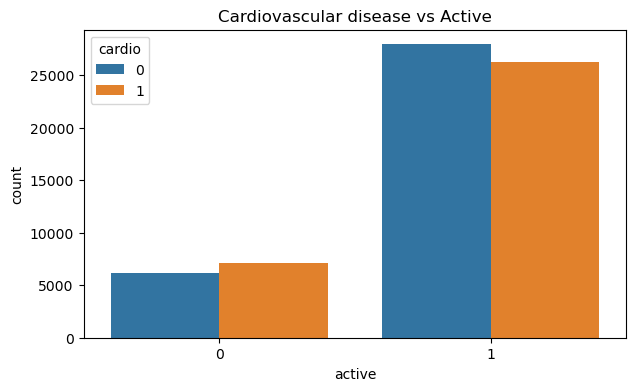

In [42]:
plt.figure(figsize = (7,4))
plt.title("Cardiovascular disease vs Active")
plt.xlabel("Active")

sns.countplot(data = dataset, x = "active",  hue = "cardio")

# Active patients had a slightly lesser chance to have a cardiovascular disease

 - It can be inferred that there are twice as many entries of data for females in comparison to males.

 - For an unknown reason, there are considerably more patients with an even yearly age than an odd yearly age. 


 - There is an increase in blood pressure with age



 - There is an increase in cholesterol with age


 - As age increases, there is a decrease in the consumption of alcohol and smoking. This may be due to a variety of reasons: 
    1. Increase in lying amongst elder patients
    2. Generational difference in the interest in consumptions
    3. Or as would have been ideally predicted through the data, a decrease in consumption as age increases due to growing concerns for health
 

     
 - Patients in higher BMI classes have higher chances to have cardiovascular diseases. Anorexic patients also have a higher chance of getting cardiovascular diseases.

 - Active patients had a slightly lesser chance to have a cardiovascular disease



In [43]:
#[1]; Tsubasa Mikami and others, Rare case of severe non-calcific aortic stenosis in an achondroplastic dwarf: surgical consideration, Interactive CardioVascular and Thoracic Surgery, Volume 34, Issue 3, March 2022, Pages 495–497, https://doi.org/10.1093/icvts/ivab335

#[2]: Little People of America. (n.d.). FAQ. Home. https://www.lpaonline.org/faq-#:~:text=A%3A%20Little%20People%20of%20America,be%20slightly%20taller%20than%20that. 

#[3]: About BMI and eating disorders. Eating Disorder Hope. (2021, November 24). https://www.eatingdisorderhope.com/information/eating-disorder/bmi 

In [44]:
dataset.head()

,id,age,male,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi,bmi_class,cardio
0,0,50,1,168,62.0,110,80,1,1,0,0,1,21.967120,2,0
1,1,55,0,156,85.0,140,90,3,1,0,0,1,34.927679,4,1
2,2,52,0,165,64.0,130,70,3,1,0,0,0,23.507805,2,1
3,3,48,1,169,82.0,150,100,1,1,0,0,1,28.710479,3,1
4,4,48,0,156,56.0,100,60,1,1,0,0,0,23.011177,2,0


In [51]:
dataset.to_csv('preprocessed_dataset.csv', index=False)

# Calculating training and testing accuracy after preprocessed data

In [52]:
from sklearn.model_selection import train_test_split
# Split the data into features (X) and target variable (y)
X = dataset.drop('cardio', axis=1)
y = dataset['cardio']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Random Forest Classifier

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
from sklearn.ensemble import RandomForestClassifier

rd = RandomForestClassifier()
rd.fit(X_train, y_train)

y_pred_train = rd.predict(X_train)
y_pred_test = rd.predict(X_test)

randforest_train_acc = accuracy_score(y_train, y_pred_train)
randforest_test_acc = accuracy_score(y_test, y_pred_test)

print('Train Accuracy:', randforest_train_acc)
print('Test Accuracy:', randforest_test_acc)

Train Accuracy: 0.976103213386643
Test Accuracy: 0.7042055382792832


## Decision Tree

In [57]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

dt_train_acc = accuracy_score(y_train, y_pred_train)
dt_test_acc = accuracy_score(y_test, y_pred_test)

print('Train Accuracy:', dt_train_acc)
print('Test Accuracy:', dt_test_acc)

Train Accuracy: 0.976103213386643
Test Accuracy: 0.6300903302236043


## K Nearest Neighbors Classifier

In [59]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

knn_train_acc = accuracy_score(y_train, y_pred_train)
knn_test_acc = accuracy_score(y_test, y_pred_test)

print('Train Accuracy:', knn_train_acc)
print('Test Accuracy:', knn_test_acc)

Train Accuracy: 0.7775803346660743
Test Accuracy: 0.6920627869095217


## Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

logreg_train_acc = accuracy_score(y_train, y_pred_train)
logreg_test_acc = accuracy_score(y_test, y_pred_test)

print('Train Accuracy:', logreg_train_acc)
print('Test Accuracy:', logreg_test_acc)

Train Accuracy: 0.7265289500962535
Test Accuracy: 0.7264919295128092


# Support Vetcor Machine

In [61]:
from sklearn.svm import SVC

In [62]:
#Performing feature scaling for better SVM performance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [63]:
#Implement SVM algorithm
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [64]:
print('Train Accuracy: ', svm.score(X_train,y_train))
print('Test Accuracy: ', svm.score(X_test,y_test))

Train Accuracy:  0.7390048867170147
Test Accuracy:  0.7337479638679105
